## Instagram posts analysis!
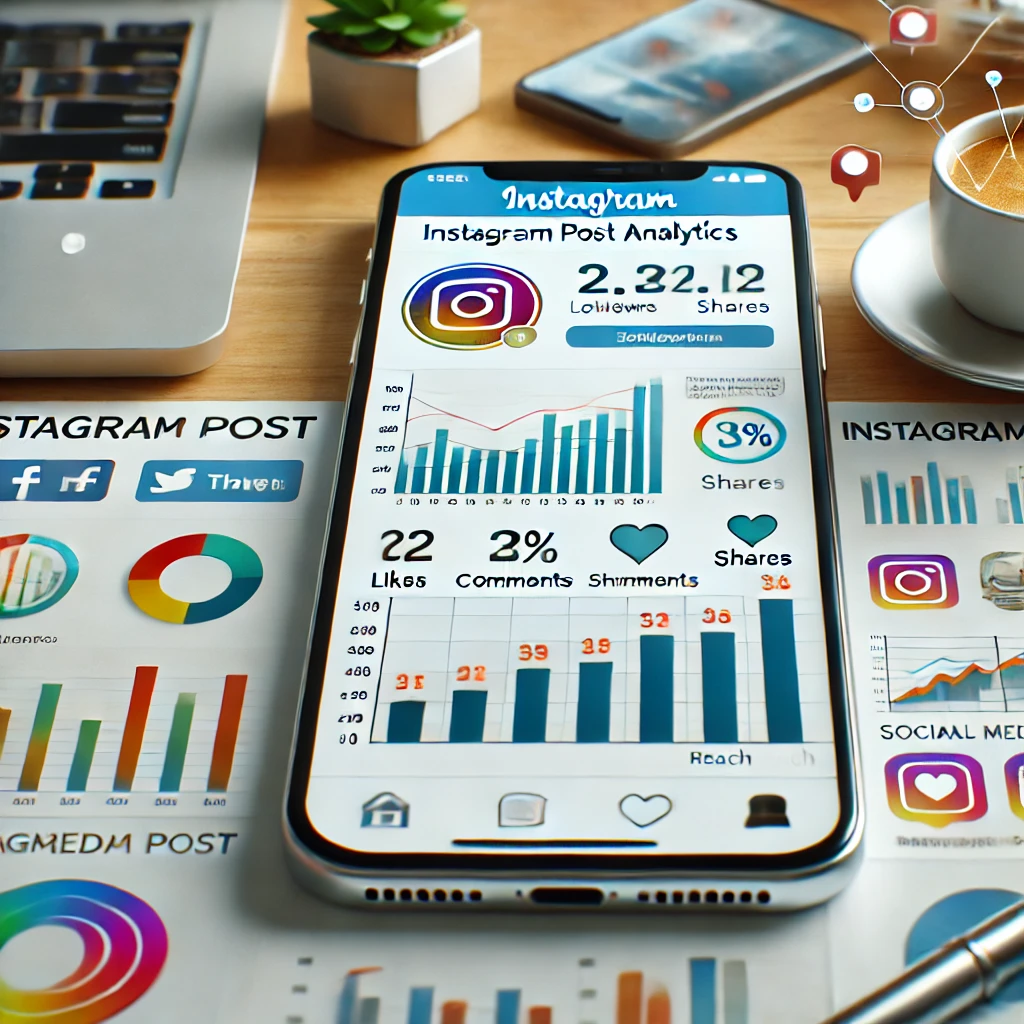

### Questions
##### 1.Main Purpose: Determine the most effective types of posts (the unicorns) to replicate their success.
##### 2.What types of posts yield the best performance?
##### 3.Does the timing of posts affect their performance?
##### 4.How do people come across my posts?
##### 5.Which hashtags generate the most engagement?
##### 6.What types of posts result in the most followers?
##### 7.What defines a "Unicorn" post?
##### 8.Which features contribute most to the engagement rate?

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Insta Post Reports.csv')

In [3]:
df.head()

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,From Home,From Profile,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type
0,Where does inspiration come from,2021/02/02,7:02,33,1,0,10,78,6,1,0.0,84.0,6.0,0.0,0.0,1,0,0,composing
1,Basic composing equipments,2021/02/04,23:03,24,0,0,6,78,9,2,0.0,89.0,4.0,0.0,0.0,2,0,0,tech
2,How to read score,2021/02/06,1:03,22,1,0,6,73,4,0,0.0,83.0,4.0,0.0,0.0,0,0,0,composing
3,Hoo to write music,2021/02/07,3:32,23,1,0,26,84,11,5,0.0,79.0,18.0,4.0,0.0,3,2,0,composing
4,Music analysis,2021/02/08,5:40,18,0,0,11,70,7,0,0.0,73.0,8.0,0.0,0.0,0,0,0,composing


In [4]:
df['Eng Rate'] = df['Engaged'] / df['Reached']

In [5]:
df['Active Rate'] = df['Profile activity'] / df['Reached']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              440 non-null    object 
 1   Post date         440 non-null    object 
 2   Post time         440 non-null    object 
 3   Likes             440 non-null    int64  
 4   Comment           440 non-null    int64  
 5   Share             440 non-null    int64  
 6   Save              440 non-null    int64  
 7   Reached           440 non-null    int64  
 8   Engaged           440 non-null    int64  
 9   Profile activity  440 non-null    int64  
 10  From Home         438 non-null    float64
 11  From Profile      438 non-null    float64
 12  From Other        438 non-null    float64
 13  From Hashtag      438 non-null    float64
 14  From Explore      438 non-null    float64
 15  Profile visits    440 non-null    int64  
 16  Follows           440 non-null    int64  
 1

In [7]:
df.isna().sum()

Name                0
Post date           0
Post time           0
Likes               0
Comment             0
Share               0
Save                0
Reached             0
Engaged             0
Profile activity    0
From Home           2
From Profile        2
From Other          2
From Hashtag        2
From Explore        2
Profile visits      0
Follows             0
Link taps           0
Type                0
Eng Rate            0
Active Rate         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,From Home,From Profile,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Eng Rate,Active Rate
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,438.000000,438.000000,438.000000,438.000000,438.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,103.261364,2.275000,3.588636,26.929545,849.513636,85.109091,22.886364,664.684932,125.792237,39.922374,118.205479,87.477169,18.745455,4.611364,0.570455,0.067557,0.020119
std,79.372524,2.797544,8.065018,29.199682,1130.123824,155.644642,43.269730,1344.725139,114.672572,74.684958,222.685808,337.536577,40.004712,12.055353,2.138601,0.075121,0.040159
min,11.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,7.000000,44.750000,1.000000,0.000000,0.000000,37.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.021918,0.000000
50%,85.000000,2.000000,0.000000,16.000000,104.500000,4.000000,2.000000,0.000000,69.000000,10.500000,5.000000,0.000000,1.000000,0.000000,0.000000,0.068764,0.013430
75%,143.250000,3.000000,4.000000,37.000000,1685.750000,154.000000,27.000000,1361.500000,213.500000,44.000000,139.250000,0.000000,23.000000,2.000000,0.000000,0.099069,0.026500
max,528.000000,18.000000,88.000000,200.000000,5732.000000,2231.000000,381.000000,22174.000000,513.000000,724.000000,1455.000000,3518.000000,513.000000,110.000000,35.000000,0.967057,0.508861


<Axes: xlabel='Eng Rate'>

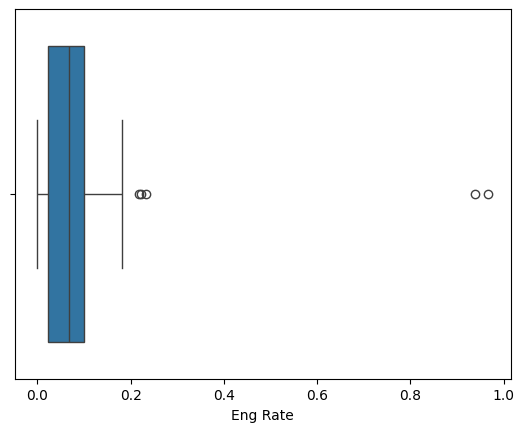

In [10]:
sns.boxplot(x=df['Eng Rate'])

In [11]:
df[df['Eng Rate'] > 0.7]

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Profile,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate
312,Keep your publishing right,2022/07/26,6:47,135,0,7,52,182,171,90,...,0.0,60.0,346.0,453.0,61,28,1,survival guide,0.939560,0.494505
343,Be careful uploading music to social media,2022/10/31,6:46,187,2,6,62,2307,2231,47,...,423.0,37.0,0.0,356.0,38,6,3,survival guide,0.967057,0.020373


In [12]:
# Turns out row 343 the Engaged should be 231, not 2231
# And row 312, the Reached should be 1842, not 182
row_index2 = 343
column_name2 = 'Engaged'
correct_value2 = 231


row_index = 312
column_name = 'Reached'
correct_value = 1842

df.at[row_index, column_name] = correct_value
df.at[row_index2, column_name2] = correct_value2

# Recalculate the Eng Rate
df['Eng Rate'] = df['Engaged'] / df['Reached']

# Inspect
df.iloc[343]
df.iloc[312]

Name                Keep your publishing right
Post date                           2022/07/26
Post time                                 6:47
Likes                                      135
Comment                                      0
Share                                        7
Save                                        52
Reached                                   1842
Engaged                                    171
Profile activity                            90
From Home                               1103.0
From Profile                               0.0
From Other                                60.0
From Hashtag                             346.0
From Explore                             453.0
Profile visits                              61
Follows                                     28
Link taps                                    1
Type                            survival guide
Eng Rate                              0.092834
Active Rate                           0.494505
Name: 312, dt

In [13]:
# Also want to check if the 0.5 activ rate is correct
df[df['Active Rate'] > 0.5]
# After looked into the post, this is right

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Profile,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate
205,Limit yourself,2021/10/27,3:58,217,3,2,68,395,45,201,...,96.0,162.0,124.0,0.0,90,110,1,composing,0.113924,0.508861


<Axes: xlabel='Active Rate'>

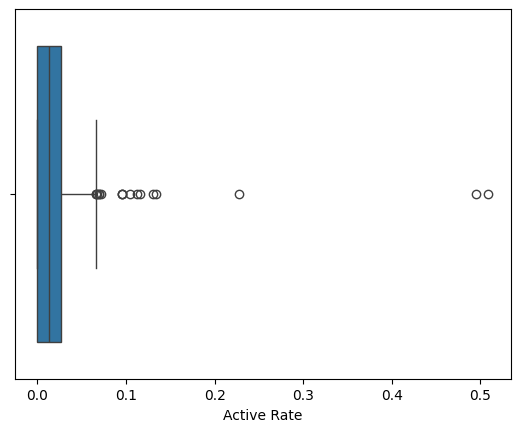

In [14]:
sns.boxplot(x=df['Active Rate'])

<Axes: xlabel='From Home'>

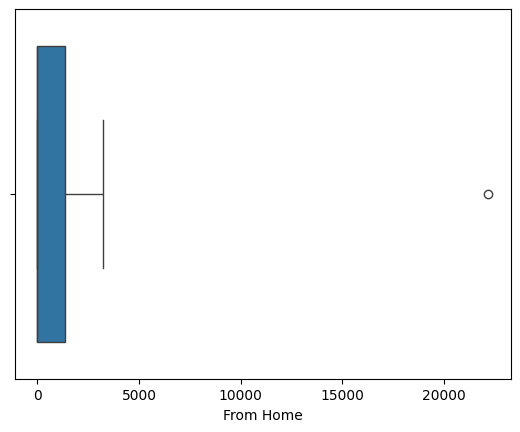

In [15]:
sns.boxplot(x=df['From Home'])

In [16]:
df[df['From Home']>20000]

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Profile,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate
395,How composers receive money,2023/5/13,2:00,204,2,12,99,2884,265,58,...,303.0,307.0,478.0,0.0,47,11,0,survival guide,0.091886,0.020111


<Axes: xlabel='From Home'>

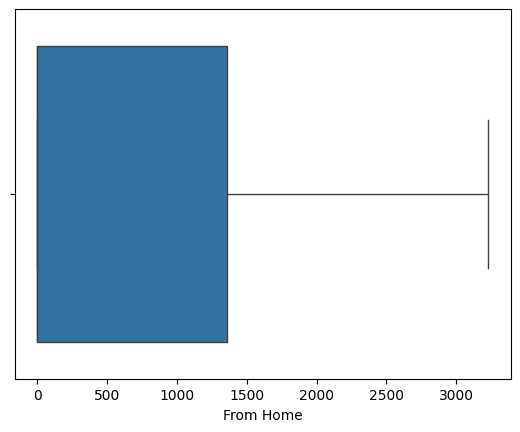

In [17]:
row_index = 395
column_name = 'From Home'
correct_value = 2174

df.at[row_index, column_name] = correct_value
sns.boxplot(x=df['From Home'])

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\70964065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Post date'] = pd.to_datetime(df_subset['Post date'])


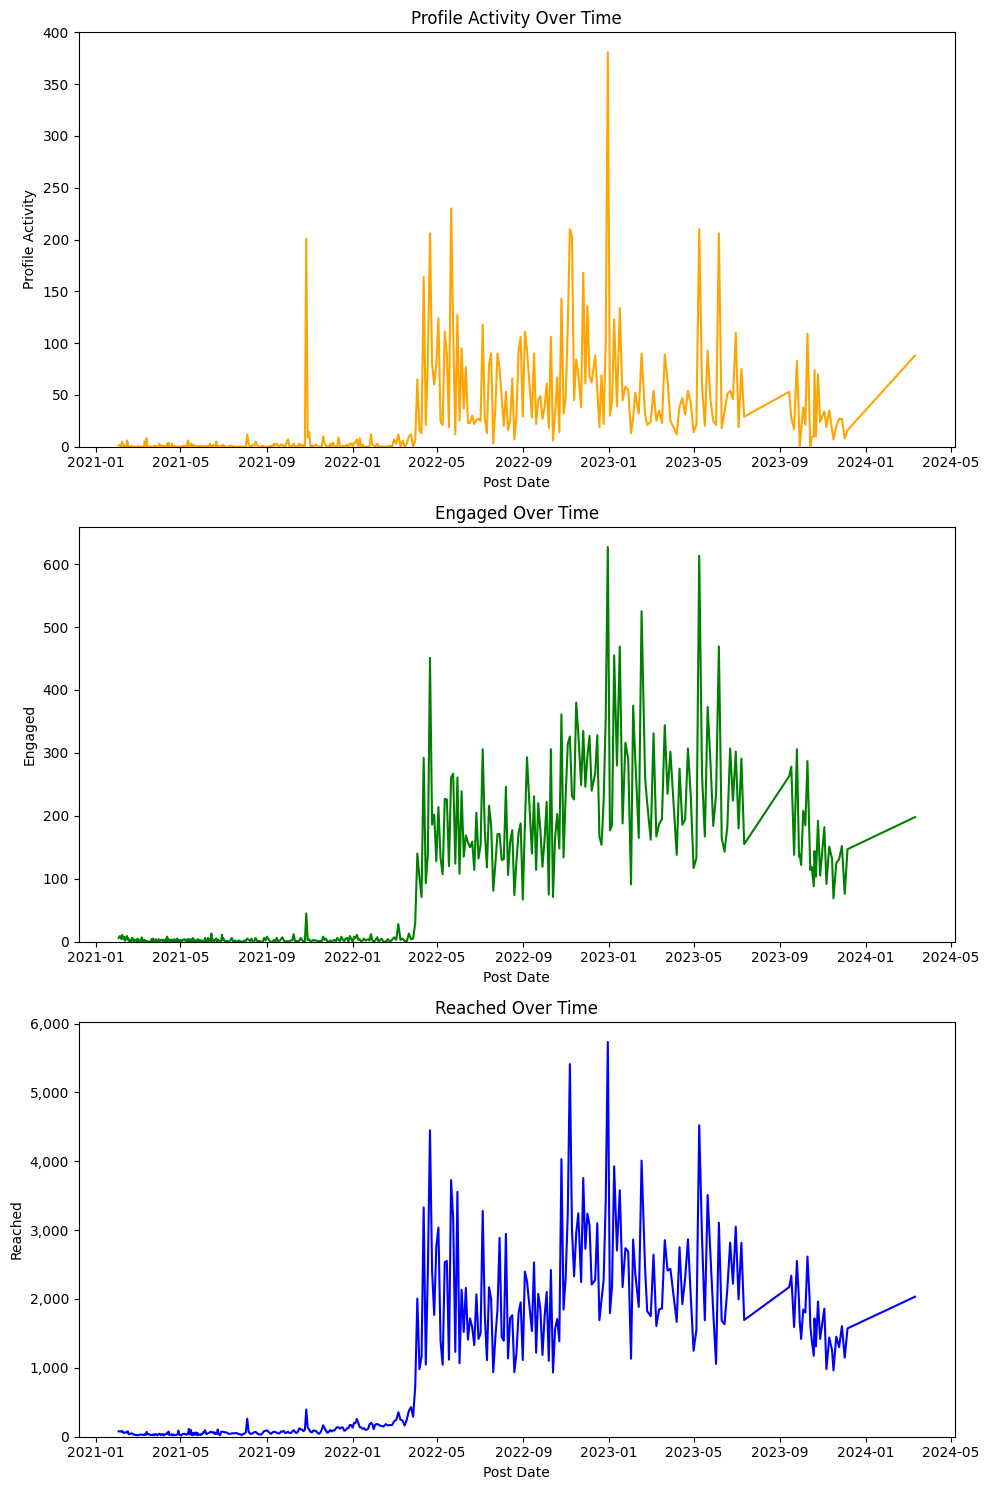

In [18]:
columns_of_interest = ['Post date', 'Reached', 'Engaged', 'Profile activity']
df_subset = df[columns_of_interest]

# Ensure 'Post date' is in datetime format
df_subset['Post date'] = pd.to_datetime(df_subset['Post date'])

# Melt the DataFrame to have a single column for the metric type (Reached, Engaged, Profile Activity)
df_melted = df_subset.melt(id_vars='Post date', var_name='Metric', value_name='Value')

# Convert 'Value' column to numeric data type
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Reached
sns.lineplot(data=df_melted[df_melted['Metric'] == 'Reached'], x='Post date', y='Value', ax=axes[2], color='blue')
axes[2].set_title('Reached Over Time')
axes[2].set_xlabel('Post Date')
axes[2].set_ylabel('Reached')
axes[2].set_ylim(bottom=0)  # Set y-axis to start from 0
axes[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis labels

# Plot Engaged
sns.lineplot(data=df_melted[df_melted['Metric'] == 'Engaged'], x='Post date', y='Value', ax=axes[1], color='green')
axes[1].set_title('Engaged Over Time')
axes[1].set_xlabel('Post Date')
axes[1].set_ylabel('Engaged')
axes[1].set_ylim(bottom=0)  # Set y-axis to start from 0
axes[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis labels

# Plot Profile activity
sns.lineplot(data=df_melted[df_melted['Metric'] == 'Profile activity'], x='Post date', y='Value', ax=axes[0], color='orange')
axes[0].set_title('Profile Activity Over Time')
axes[0].set_xlabel('Post Date')
axes[0].set_ylabel('Profile Activity')
axes[0].set_ylim(bottom=0)  # Set y-axis to start from 0
axes[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Format y-axis labels

plt.tight_layout()
plt.show()

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\1597583168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Post date'] = pd.to_datetime(df_subset['Post date'])


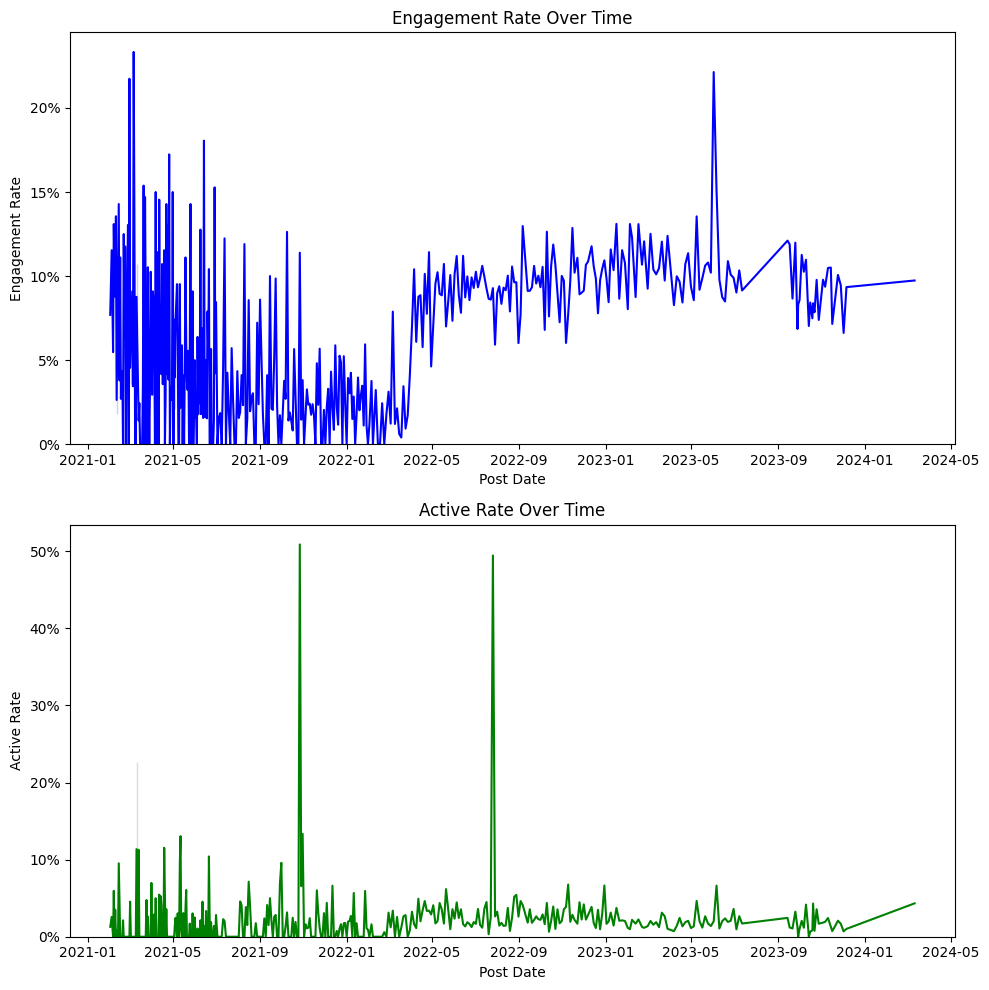

In [19]:
columns_of_interest = ['Post date', 'Eng Rate', 'Active Rate']
df_subset = df[columns_of_interest]

# Ensure 'Post date' is in datetime format
df_subset['Post date'] = pd.to_datetime(df_subset['Post date'])

# Melt the DataFrame to have a single column for the metric type (Eng rate, Active rate)
df_melted = df_subset.melt(id_vars='Post date', var_name='Metric', value_name='Value')

# Convert 'Value' column to numeric data type
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot Eng rate
sns.lineplot(data=df_melted[df_melted['Metric'] == 'Eng Rate'], x='Post date', y='Value', ax=axes[0], color='blue')
axes[0].set_title('Engagement Rate Over Time')
axes[0].set_xlabel('Post Date')
axes[0].set_ylabel('Engagement Rate')
axes[0].set_ylim(bottom=0)  # Set y-axis to start from 0
axes[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))  # Format y-axis labels as percentage

# Plot Active rate
sns.lineplot(data=df_melted[df_melted['Metric'] == 'Active Rate'], x='Post date', y='Value', ax=axes[1], color='green')
axes[1].set_title('Active Rate Over Time')
axes[1].set_xlabel('Post Date')
axes[1].set_ylabel('Active Rate')
axes[1].set_ylim(bottom=0)  # Set y-axis to start from 0
axes[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))  # Format y-axis labels as percentage

plt.tight_layout()
plt.show()

In [20]:
df['Type'].value_counts()

Type
composing            123
survival guide        88
intro to composer     77
music life            47
tech                  46
about film            40
study aboard          14
game music             5
Name: count, dtype: int64

In [21]:
df['Reached'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
tech                 1152.978261
composing            1144.186992
music life           1124.085106
game music            805.800000
survival guide        744.965909
intro to composer     472.038961
about film            438.575000
study aboard          383.285714
Name: Reached, dtype: float64

In [22]:
df['Engaged'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
tech                 114.413043
music life           113.276596
composing            108.105691
survival guide        70.988636
game music            58.400000
intro to composer     39.038961
study aboard          38.928571
about film            36.850000
Name: Engaged, dtype: float64

In [23]:
df['Profile activity'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
music life           37.191489
composing            34.097561
tech                 29.586957
game music           19.600000
survival guide       18.454545
study aboard          9.714286
intro to composer     7.948052
about film            7.425000
Name: Profile activity, dtype: float64

In [24]:
df['Share'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
music life           7.170213
tech                 4.130435
composing            4.073171
survival guide       4.022727
game music           3.200000
study aboard         2.071429
about film           1.625000
intro to composer    1.129870
Name: Share, dtype: float64

In [25]:
df['Save'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
tech                 50.913043
music life           35.000000
composing            32.406504
survival guide       25.500000
game music           19.800000
study aboard         19.785714
intro to composer    11.454545
about film            9.350000
Name: Save, dtype: float64

In [26]:
df['Eng Rate'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
tech                 0.084996
composing            0.073961
survival guide       0.068845
music life           0.065189
study aboard         0.058335
about film           0.049932
game music           0.040611
intro to composer    0.037207
Name: Eng Rate, dtype: float64

In [27]:
df['Active Rate'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
composing            0.025802
tech                 0.024734
survival guide       0.022538
music life           0.021276
study aboard         0.018665
about film           0.012926
game music           0.010361
intro to composer    0.009451
Name: Active Rate, dtype: float64

In [28]:
# Separate the Post time into 24hour chunks
df['Post time'] = pd.to_datetime(df['Post time'])
df['Hour'] = df['Post time'].dt.hour
df.head()

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\3517467723.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Post time'] = pd.to_datetime(df['Post time'])


,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour
0,Where does inspiration come from,2021/02/02,2024-12-13 07:02:00,33,1,0,10,78,6,1,...,6.0,0.0,0.0,1,0,0,composing,0.076923,0.012821,7
1,Basic composing equipments,2021/02/04,2024-12-13 23:03:00,24,0,0,6,78,9,2,...,4.0,0.0,0.0,2,0,0,tech,0.115385,0.025641,23
2,How to read score,2021/02/06,2024-12-13 01:03:00,22,1,0,6,73,4,0,...,4.0,0.0,0.0,0,0,0,composing,0.054795,0.000000,1
3,Hoo to write music,2021/02/07,2024-12-13 03:32:00,23,1,0,26,84,11,5,...,18.0,4.0,0.0,3,2,0,composing,0.130952,0.059524,3
4,Music analysis,2021/02/08,2024-12-13 05:40:00,18,0,0,11,70,7,0,...,8.0,0.0,0.0,0,0,0,composing,0.100000,0.000000,5


In [29]:
df['Follows'].groupby(df['Hour']).mean().sort_values(ascending=False)

Hour
0     5.717949
23    5.666667
6     5.200000
2     5.192308
3     4.902439
1     4.629630
5     4.392157
4     4.183099
7     2.906250
8     0.000000
13    0.000000
20    0.000000
21    0.000000
Name: Follows, dtype: float64

In [30]:
df['Reached'].groupby(df['Hour']).mean().sort_values(ascending=False)

Hour
0     1096.538462
1     1022.296296
6      939.450000
4      928.197183
23     789.333333
2      733.653846
3      716.317073
5      664.901961
7      654.312500
20     165.500000
21      48.000000
8       32.000000
13      28.000000
Name: Reached, dtype: float64

In [31]:
df['Eng Rate'].groupby(df['Hour']).mean().sort_values(ascending=False)

Hour
7     0.080006
23    0.074611
6     0.068188
4     0.067425
8     0.065601
3     0.064694
1     0.061910
0     0.061207
2     0.057997
5     0.053157
20    0.045206
13    0.035714
21    0.020833
Name: Eng Rate, dtype: float64

In [32]:
df['Share'].groupby(df['Hour']).mean().sort_values(ascending=False)

Hour
23    9.666667
1     5.148148
0     4.717949
6     4.633333
4     3.098592
3     3.024390
5     2.333333
7     2.250000
2     2.057692
8     0.000000
13    0.000000
20    0.000000
21    0.000000
Name: Share, dtype: float64

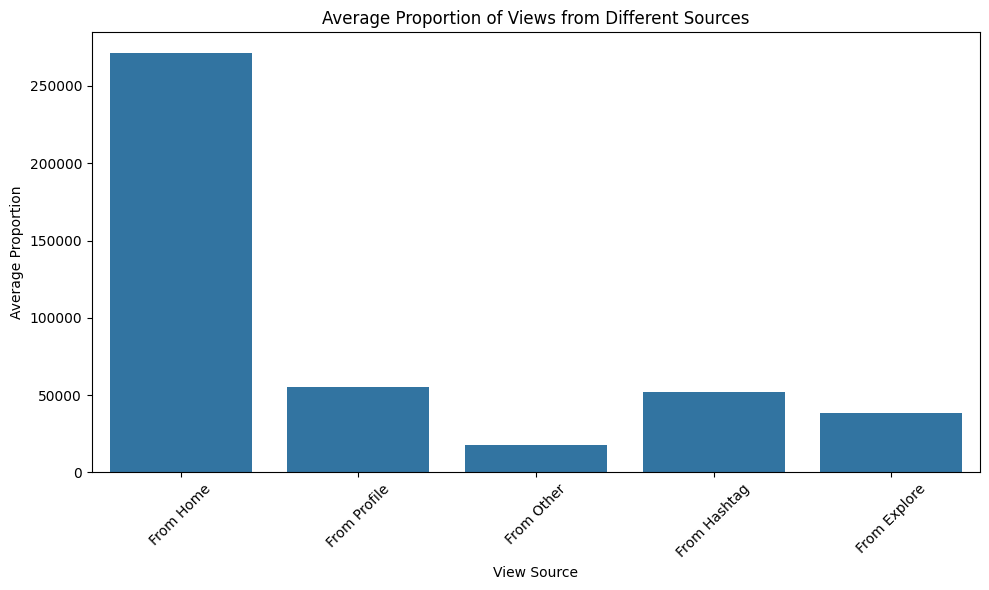

In [33]:
average_proportion = df[['From Home', 'From Profile', 'From Other', 'From Hashtag', 'From Explore']].sum()

# Plot the average proportion of views from each source
plt.figure(figsize=(10, 6))
sns.barplot(x=average_proportion.index, y=average_proportion.values)
plt.title('Average Proportion of Views from Different Sources')
plt.xlabel('View Source')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df['From Hashtag'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
music life           211.148936
tech                 178.413043
composing            156.115702
survival guide       105.170455
intro to composer     42.766234
study aboard          39.785714
about film            38.875000
game music            18.600000
Name: From Hashtag, dtype: float64

<Axes: xlabel='From Hashtag'>

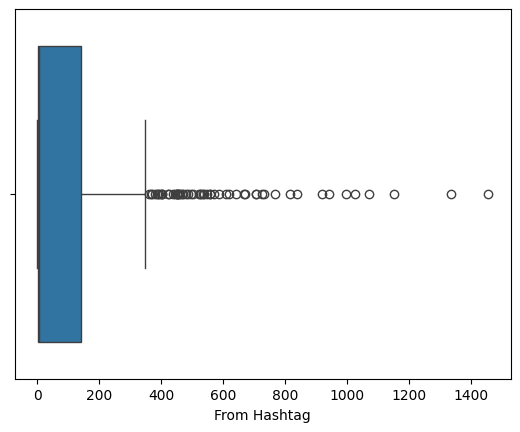

In [35]:
sns.boxplot(x=df['From Hashtag'])

In [36]:
# Posts with over around 350 from hashtag are considered outliers
df[df['From Hashtag']>350].sort_values(by='From Hashtag', ascending=False).head()

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour
341,"Kontakt is an engine, not instrument",2022/10/25,2024-12-13 04:38:00,279,12,13,100,4032,361,143,...,133.0,1455.0,687.0,99,39,5,tech,0.089534,0.035466,4
316,What to do as a slow score reader,2022/08/07,2024-12-13 04:00:00,203,4,8,60,2946,246,53,...,50.0,1335.0,0.0,43,8,2,composing,0.083503,0.017990,4
367,NY compression,2023/1/16,2024-12-13 05:58:00,334,3,21,200,3578,469,134,...,325.0,1150.0,0.0,108,26,0,tech,0.131079,0.037451,5
375,Only rich kid can play music?,2023/2/16,2024-12-13 00:24:00,431,10,44,127,4010,525,90,...,390.0,1070.0,0.0,79,9,2,music life,0.130923,0.022444,0
280,Just be responsible,2022/04/21,2024-12-13 01:30:00,354,1,88,112,4451,451,206,...,350.0,1026.0,2196.0,138,67,1,survival guide,0.101326,0.046282,1


<Axes: xlabel='From Explore'>

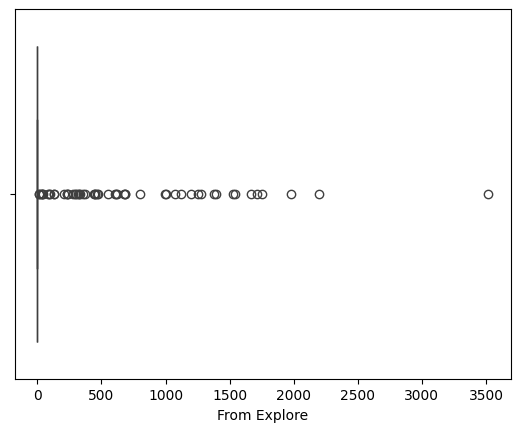

In [37]:
sns.boxplot(x=df['From Explore'])

In [38]:
explore_df = df[df['From Explore']>500]
explore_df

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour
274,Let music be the second role,2022/04/03,2024-12-13 04:00:00,124,8,0,18,2006,140,65,...,26.0,0.0,687.0,49,16,0,composing,0.069791,0.032403,4
277,How to deal with rejection,2022/04/12,2024-12-13 06:03:00,228,1,39,74,3329,292,164,...,168.0,460.0,1752.0,104,60,0,survival guide,0.087714,0.049264,6
279,Chiptune,2022/04/18,2024-12-13 07:00:00,110,0,12,35,2424,140,83,...,37.0,0.0,1380.0,56,26,1,game music,0.057756,0.034241,7
280,Just be responsible,2022/04/21,2024-12-13 01:30:00,354,1,88,112,4451,451,206,...,350.0,1026.0,2196.0,138,67,1,survival guide,0.101326,0.046282,1
281,Custom earphone,2022/04/24,2024-12-13 04:00:00,138,13,5,48,2398,186,80,...,50.0,469.0,802.0,64,16,0,music life,0.077565,0.033361,4
283,Kondo Koji,2022/04/30,2024-12-13 02:00:00,110,0,9,18,2768,128,80,...,45.0,0.0,1523.0,59,39,9,intro to composer,0.046243,0.028902,2
284,Should I find a teacher,2022/05/03,2024-12-13 05:38:00,167,0,10,49,3036,214,124,...,149.0,0.0,1397.0,83,40,1,music life,0.070487,0.040843,5
287,Ready for accumulation,2022/05/12,2024-12-13 01:26:00,182,0,28,65,2538,227,111,...,139.0,334.0,1121.0,68,42,1,survival guide,0.089441,0.043735,1
288,First priciple thinking,2022/05/15,2024-12-13 04:00:00,175,6,15,55,2552,226,90,...,122.0,607.0,605.0,75,14,1,music life,0.088558,0.035266,4
290,How to know your music quality,2022/05/21,2024-12-13 02:00:00,198,7,9,66,3726,261,230,...,97.0,724.0,1668.0,147,82,1,composing,0.070048,0.061728,2


In [39]:
explore_df['Name'].groupby(explore_df['Type']).count().sort_values(ascending=False)

Type
composing            12
music life            4
survival guide        4
tech                  3
game music            1
intro to composer     1
Name: Name, dtype: int64

In [40]:
# Post time
explore_df['Likes'].groupby(explore_df['Hour']).mean().sort_values(ascending=False)

Hour
0    291.750000
1    240.285714
5    228.666667
6    204.500000
3    202.000000
4    179.000000
7    154.500000
2    154.000000
Name: Likes, dtype: float64

In [41]:
print("Like:",explore_df['Likes'].median())
print("Comment:",explore_df['Comment'].median())
print("Share:",explore_df['Share'].median())
print("Save:",explore_df['Save'].median())

Like: 199.0
Comment: 2.0
Share: 12.0
Save: 66.0


In [42]:
df['Follows'].groupby(df['Type']).mean().sort_values(ascending=False)

Type
composing            7.943089
music life           6.404255
tech                 5.630435
game music           5.200000
survival guide       3.363636
intro to composer    1.688312
study aboard         0.928571
about film           0.675000
Name: Follows, dtype: float64

<Axes: xlabel='Follows'>

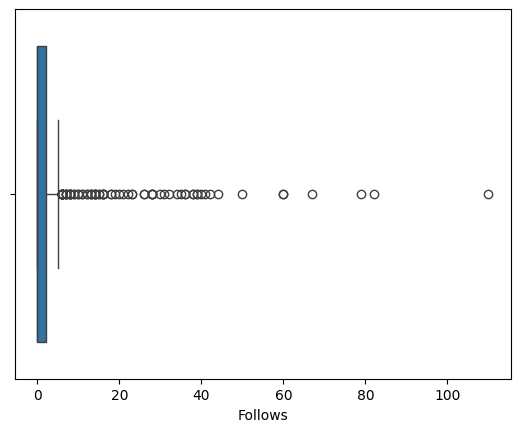

In [43]:
# See how the Follows distributes
sns.boxplot(x=df['Follows'])

In [44]:
# Basically over 7 or 8 can be considered outliers, but let go with 15
follow_df = df[df['Follows']>=15]
print(len(follow_df))
follow_df['Name'].groupby(follow_df['Type']).count().sort_values(ascending=False)

42


Type
composing            21
music life            8
survival guide        5
tech                  5
intro to composer     2
game music            1
Name: Name, dtype: int64

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\3738231504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Likes'], orient="h", palette="Set1")


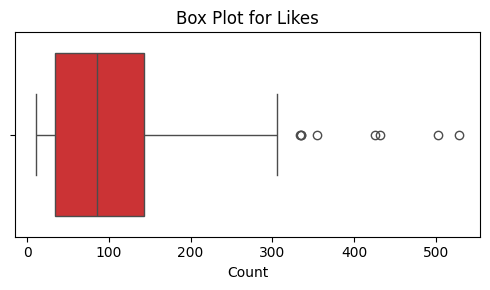

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\3738231504.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Share'], orient="h", palette="Set2")


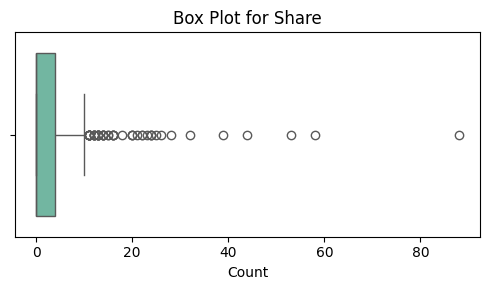

C:\Users\MOULEE\AppData\Local\Temp\ipykernel_9048\3738231504.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Eng Rate'], orient="h", palette="Set3")


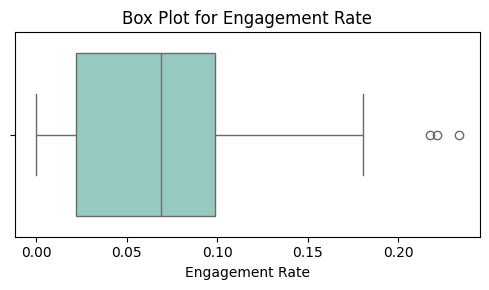

In [45]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df['Likes'], orient="h", palette="Set1")
plt.title('Box Plot for Likes')
plt.xlabel('Count')

# Show the Likes plot
plt.tight_layout()
plt.show()

# Set up the figure and axes for the Share plot
plt.figure(figsize=(5, 3))
sns.boxplot(data=df['Share'], orient="h", palette="Set2")
plt.title('Box Plot for Share')
plt.xlabel('Count')

# Show the Share plot
plt.tight_layout()
plt.show()

# Set up the figure and axes for the Eng rate plot
plt.figure(figsize=(5, 3))
sns.boxplot(data=df['Eng Rate'], orient="h", palette="Set3")
plt.title('Box Plot for Engagement Rate')
plt.xlabel('Engagement Rate')

# Show the Eng rate plot
plt.tight_layout()
plt.show()

In [46]:
df[(df['Likes']>300)&(df['Share']>8)&(df['Eng Rate']>0.15)]

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour
401,Thoughts after leaving my job,2023/6/6,2024-12-13 06:26:00,426,8,13,53,3108,469,206,...,127.0,278.0,0.0,197,5,4,music life,0.150901,0.066281,6


In [47]:
unicorn = df[df['Likes']>300]
unicorn

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Other,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour
280,Just be responsible,2022/04/21,2024-12-13 01:30:00,354,1,88,112,4451,451,206,...,350.0,1026.0,2196.0,138,67,1,survival guide,0.101326,0.046282,1
362,Write music for adult film,2022/12/30,2024-12-13 00:06:00,503,8,53,97,5732,627,381,...,280.0,704.0,1977.0,313,60,8,composing,0.109386,0.066469,0
365,What to do with orchestration,2023/1/8,2024-12-13 01:00:00,335,2,23,167,3927,455,123,...,277.0,996.0,677.0,99,23,1,composing,0.115865,0.031322,1
367,NY compression,2023/1/16,2024-12-13 05:58:00,334,3,21,200,3578,469,134,...,325.0,1150.0,0.0,108,26,0,tech,0.131079,0.037451,5
372,Non instrumental instruments,2023/2/4,2024-12-13 01:15:00,335,7,25,55,2863,375,28,...,201.0,361.0,0.0,24,3,1,composing,0.130981,0.009780,1
375,Only rich kid can play music?,2023/2/16,2024-12-13 00:24:00,431,10,44,127,4010,525,90,...,390.0,1070.0,0.0,79,9,2,music life,0.130923,0.022444,0
394,What is professional,2023/5/9,2024-12-13 23:15:00,528,4,58,143,4523,613,210,...,724.0,641.0,0.0,175,34,1,music life,0.135530,0.046429,23
397,Use less tracks,2023/5/21,2024-12-13 04:00:00,306,3,12,84,3510,373,93,...,248.0,839.0,0.0,74,18,1,composing,0.106268,0.026496,4
401,Thoughts after leaving my job,2023/6/6,2024-12-13 06:26:00,426,8,13,53,3108,469,206,...,127.0,278.0,0.0,197,5,4,music life,0.150901,0.066281,6


In [48]:
unicorn['Name'].groupby(unicorn['Type']).count()

Type
composing         4
music life        3
survival guide    1
tech              1
Name: Name, dtype: int64

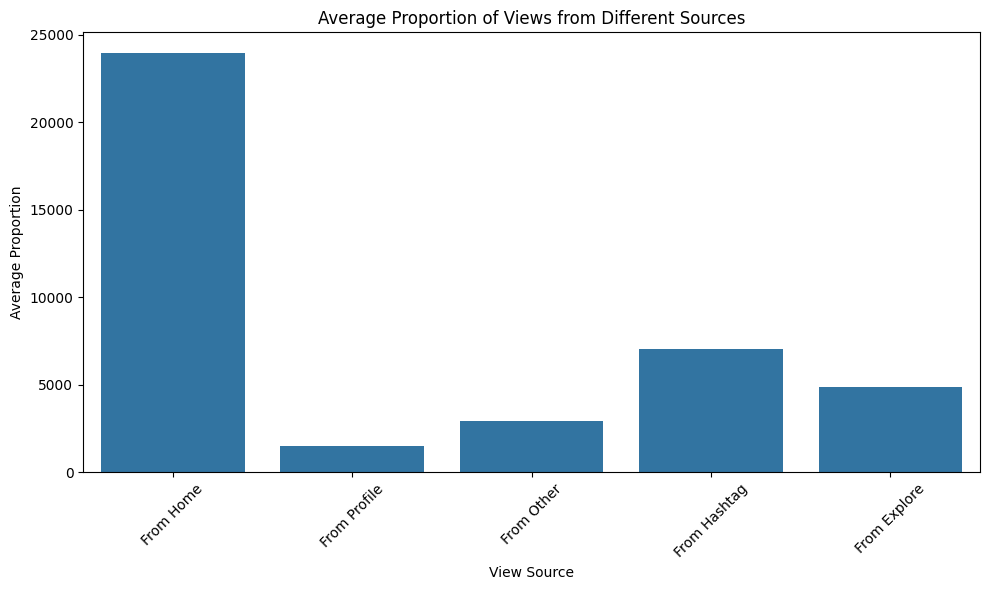

In [49]:
# How people saw these posts
average = unicorn[['From Home', 'From Profile', 'From Other', 'From Hashtag', 'From Explore']].sum()

# Plot the average proportion of views from each source
plt.figure(figsize=(10, 6))
sns.barplot(x=average.index, y=average.values)
plt.title('Average Proportion of Views from Different Sources')
plt.xlabel('View Source')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Post time
unicorn['Likes'].groupby(unicorn['Hour']).mean().sort_values(ascending=False)

Hour
23    528.000000
0     467.000000
6     426.000000
1     341.333333
5     334.000000
4     306.000000
Name: Likes, dtype: float64

In [51]:
# Eng rate and Active rate
print('Engagment rate:' ,unicorn['Eng Rate'].mean())
print('Active rate:' , unicorn['Active Rate'].mean())

Engagment rate: 0.12358413281365863
Active rate: 0.03921698727266697


In [52]:
label_encoder = LabelEncoder()

# Fit and transform the 'Type' column
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])

# Display the unique categories and their corresponding encoded values
print("Encoded Values:")
print(pd.DataFrame({'Type': df['Type'].unique(), 'Encoded Value': df['Type_encoded'].unique()}))

Encoded Values:
                Type  Encoded Value
0          composing              1
1               tech              7
2     survival guide              6
3         about film              0
4  intro to composer              3
5       study aboard              5
6         game music              2
7         music life              4


In [53]:
df = df.dropna(axis=0)

C:\Users\MOULEE\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error: 0.025507766447266357


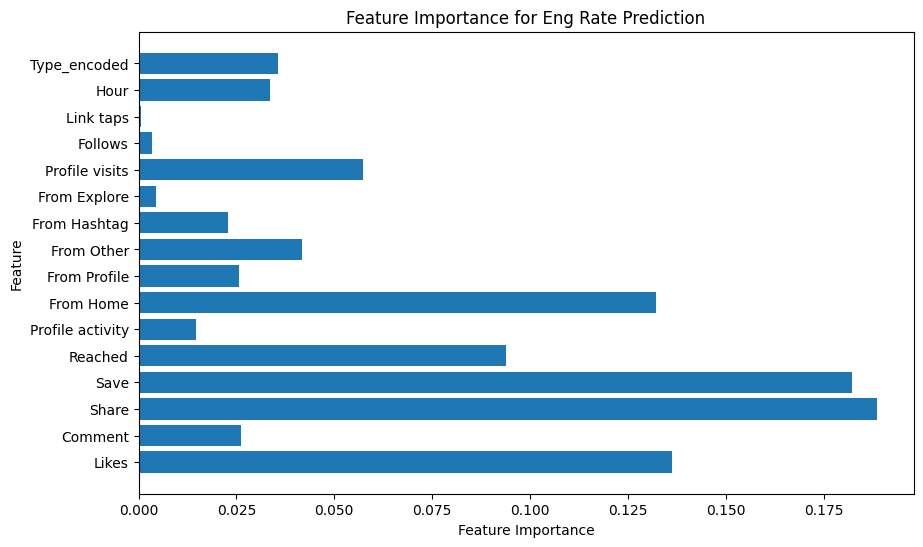

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = df[['Likes', 'Comment', 'Share', 'Save', 'Reached', 'Profile activity', 'From Home', 'From Profile', 'From Other', 'From Hashtag', 'From Explore', 'Profile visits', 'Follows', 'Link taps', 'Hour', 'Type_encoded']]

# Target variable
y = df['Eng Rate']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Feature importance
feature_importance = rf_regressor.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Eng Rate Prediction')
plt.show()

Root Mean Squared Error: 0.02893462791503298


C:\Users\MOULEE\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


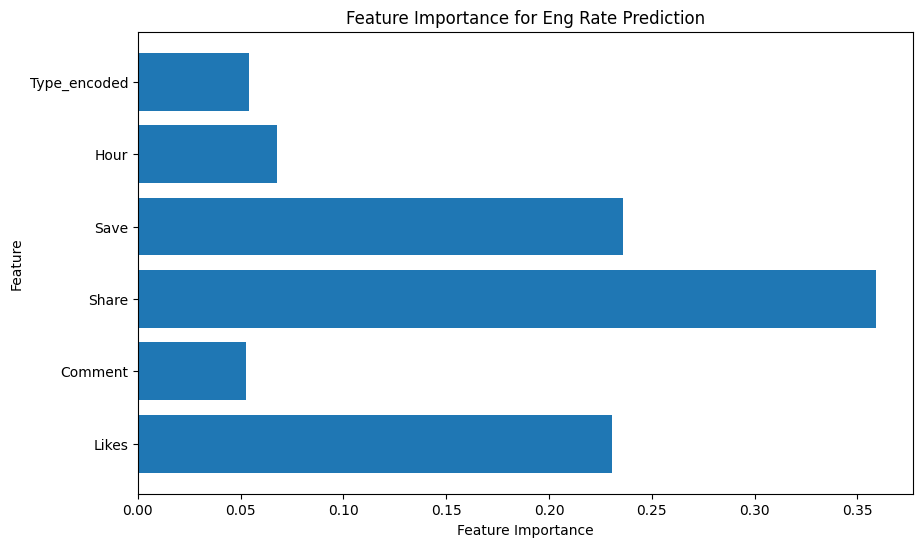

In [55]:
X = df[['Likes', 'Comment', 'Share', 'Save', 'Hour', 'Type_encoded']]

# Target variable
y = df['Eng Rate']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Feature importance
feature_importance = rf_regressor.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Eng Rate Prediction')
plt.show()

<Axes: xlabel='Share'>

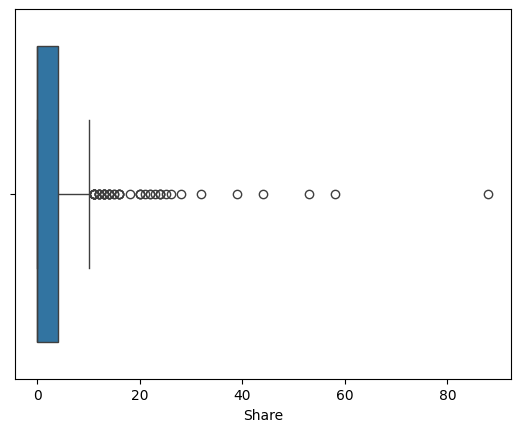

In [56]:
sns.boxplot(x=df['Share'])

In [57]:
unicorn_share = df[df['Share']>=15]
unicorn_share

,Name,Post date,Post time,Likes,Comment,Share,Save,Reached,Engaged,Profile activity,...,From Hashtag,From Explore,Profile visits,Follows,Link taps,Type,Eng Rate,Active Rate,Hour,Type_encoded
277,How to deal with rejection,2022/04/12,2024-12-13 06:03:00,228,1,39,74,3329,292,164,...,460.0,1752.0,104,60,0,survival guide,0.087714,0.049264,6,6
280,Just be responsible,2022/04/21,2024-12-13 01:30:00,354,1,88,112,4451,451,206,...,1026.0,2196.0,138,67,1,survival guide,0.101326,0.046282,1,6
282,Shepard tone,2022/04/27,2024-12-13 04:36:00,156,2,16,62,1768,202,60,...,0.0,474.0,32,28,0,composing,0.114253,0.033937,4,1
287,Ready for accumulation,2022/05/12,2024-12-13 01:26:00,182,0,28,65,2538,227,111,...,334.0,1121.0,68,42,1,survival guide,0.089441,0.043735,1,6
288,First priciple thinking,2022/05/15,2024-12-13 04:00:00,175,6,15,55,2552,226,90,...,607.0,605.0,75,14,1,music life,0.088558,0.035266,4,4
291,Auto mixing?,2022/05/24,2024-12-13 06:35:00,181,5,20,94,3154,267,111,...,520.0,1255.0,79,32,0,tech,0.084654,0.035193,6,7
293,Design your ensemble,2022/05/30,2024-12-13 07:00:00,199,2,16,66,3555,261,127,...,571.0,1714.0,79,44,4,composing,0.073418,0.035724,7,1
295,Practice thinking,2022/06/05,2024-12-13 03:45:00,188,6,26,58,2135,239,95,...,705.0,0.0,72,20,3,music life,0.111944,0.044496,3,4
305,Loudest sound in recent history,2022/07/05,2024-12-13 05:30:00,267,4,18,40,3279,306,118,...,768.0,1075.0,80,36,2,music life,0.093321,0.035987,5,4
323,9-5?,2022/08/28,2024-12-13 04:00:00,165,1,22,28,1951,188,106,...,942.0,0.0,80,18,8,music life,0.096361,0.054331,4,4


In [58]:
unicorn_share['Name'].groupby(unicorn_share['Type']).count().sort_values(ascending=False)

Type
composing         8
music life        8
survival guide    5
tech              3
about film        1
study aboard      1
Name: Name, dtype: int64

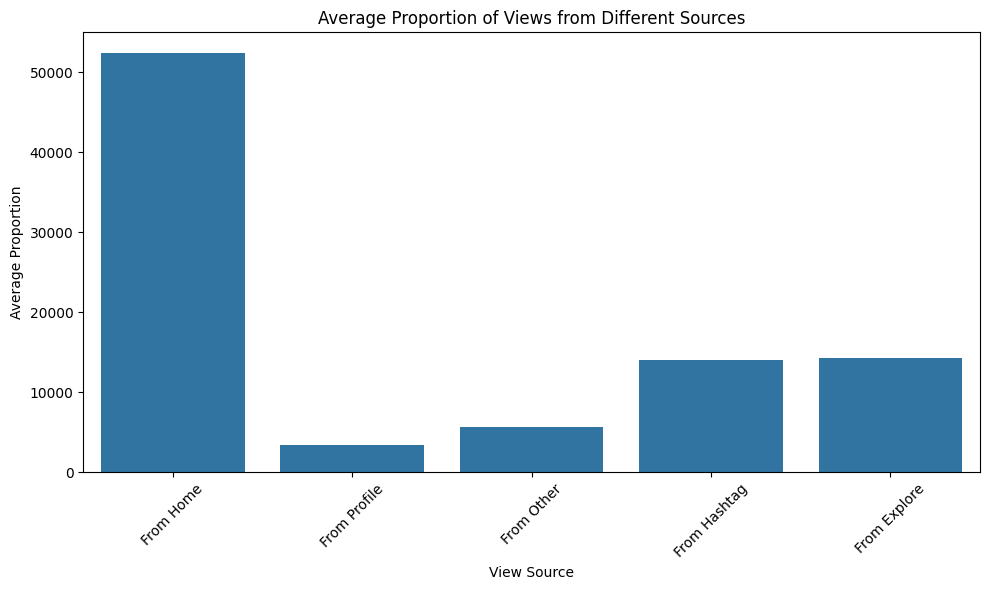

In [59]:
# How people saw these posts
average = unicorn_share[['From Home', 'From Profile', 'From Other', 'From Hashtag', 'From Explore']].sum()

# Plot the average proportion of views from each source
plt.figure(figsize=(10, 6))
sns.barplot(x=average.index, y=average.values)
plt.title('Average Proportion of Views from Different Sources')
plt.xlabel('View Source')
plt.ylabel('Average Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Post time
unicorn_share['Share'].groupby(unicorn['Hour']).mean().sort_values(ascending=False)

Hour
23.0    58.000000
0.0     48.500000
1.0     45.333333
5.0     21.000000
Name: Share, dtype: float64

In [61]:
# Eng rate and Active rate
print('Engagment rate:' ,unicorn_share['Eng Rate'].mean())
print('Active rate:' , unicorn_share['Active Rate'].mean())

Engagment rate: 0.10694289636092832
Active rate: 0.035342311076630134


# Conclusion

### Posting time
#### 23pm - 1am is the best time to post.

### How people see my post and how to grow follow
#### From home
##### “From Home” has much higher exposure than others
##### Focus on growing follower and share will increase this number
##### Composing averagely grows the most follower (21), Music life the second (8)
#### From Hashtag
##### Still, Composing, Music life, and Tech are the top post types that people find from Hashtag.
##### According to the Unicorn 1 and 2, #selfdiscipline #responsible #mix #mixing #digitalmusic are good hashtag to include
#### Get into Explore page
##### Composing has averagely the highest number
##### Post at 0 am
##### Higher Like and Save seems has better chance get into Explore page
##### In order to increase like, according to Unicorn1 (measured by Like)
##### write more in Composing and Music life types.
##### Use Hashtags above
##### Post at 23pm - 1am
##### Post regularly every 3 days
##### Cycle back to the top of conclusion, once the From Explore number increase, the Engagement and Profile activity might surge as well.
#### Action
##### Create only Composing and Music life post types
##### Talk more about tutorial in composing and mixing, interesting working experience, fun facts, life thoughts, working ethic
##### Post every 3 days
##### Post at 0am
##### Use Hashtags: #selfdiscipline #responsible #mix #mixing #digitalmusic